# This notebook is to verify attention Metrics

### beta/(alpha+theta) increases with elevated attention
### theta/beta decreases with elevated attention


In [1]:
import sys
sys.path.append('../')

import config
from data import load_all_pickle_files
from data import plot_signal
from pathlib import Path

Using config.dataReader - random number


In [2]:
ec_path = Path('../test_data/raghav_eyes_closed/')
w_path = Path('../test_data/raghav_work/')

ec_data = load_all_pickle_files(ec_path,vstack=True)
w_data = load_all_pickle_files(w_path,vstack=True)

Loading data from ../test_data/raghav_eyes_closed 
Loading File: [f]raghav_eyes_closed_2|111019_122051.pickle
Loading File: [f]eyes_closed|141019_160513.pickle
Loading File: [f]raghavendra_eyes_closed|151019_162800.pickle
Loading File: [f]raghav_eyes_closed_3|111019_122407.pickle
Loading File: [f]raghav_eyes_closed_1|111019_121756.pickle
Using vstack=True
Loading data from ../test_data/raghav_work 
Loading File: [f]assignment|141019_190516.pickle
Loading File: [f]reading_research_paper_1|111019_145415.pickle
Loading File: [f]reading_research_paper_1|111019_150922.pickle
Loading File: [f]ragavendra_attention|171019_133116.pickle
Using vstack=True


In [3]:
print(ec_data.shape)
print(w_data.shape)

(1080, 8, 250)
(2460, 8, 250)


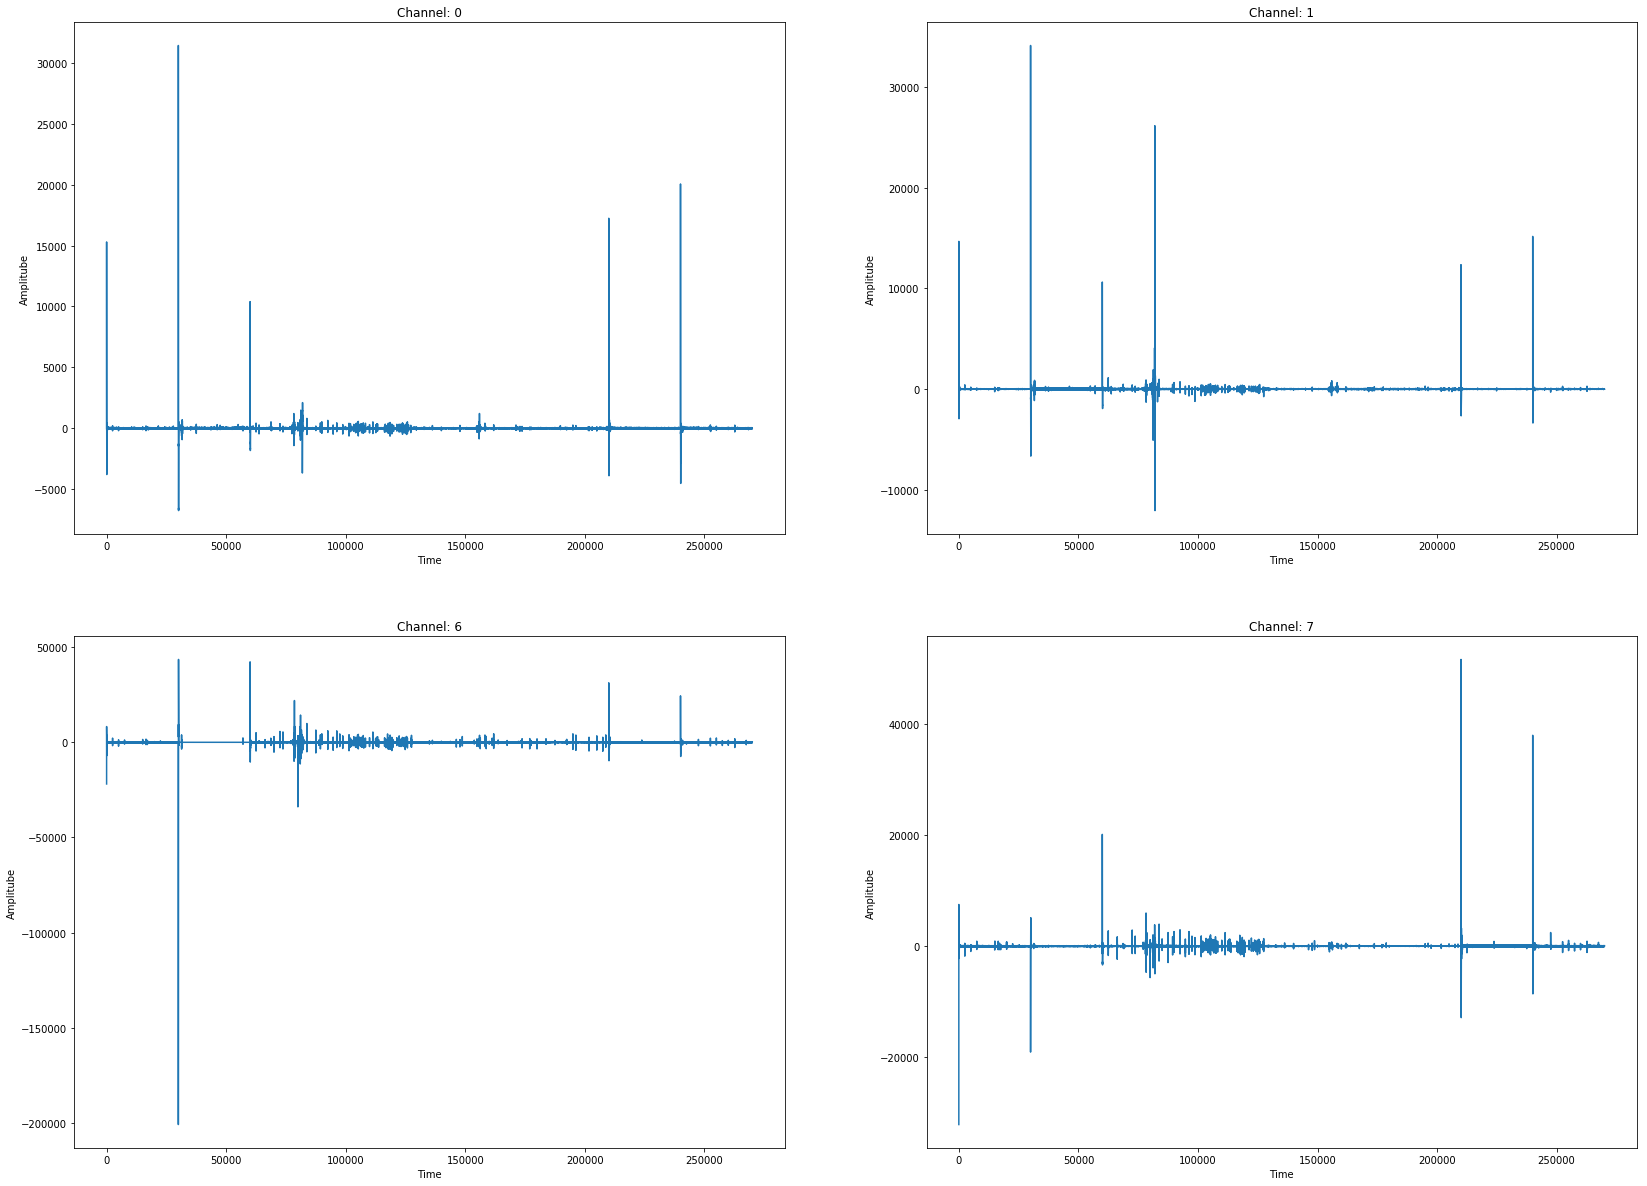

In [4]:
plot_signal(ec_data,channels=[0,1,6,7])

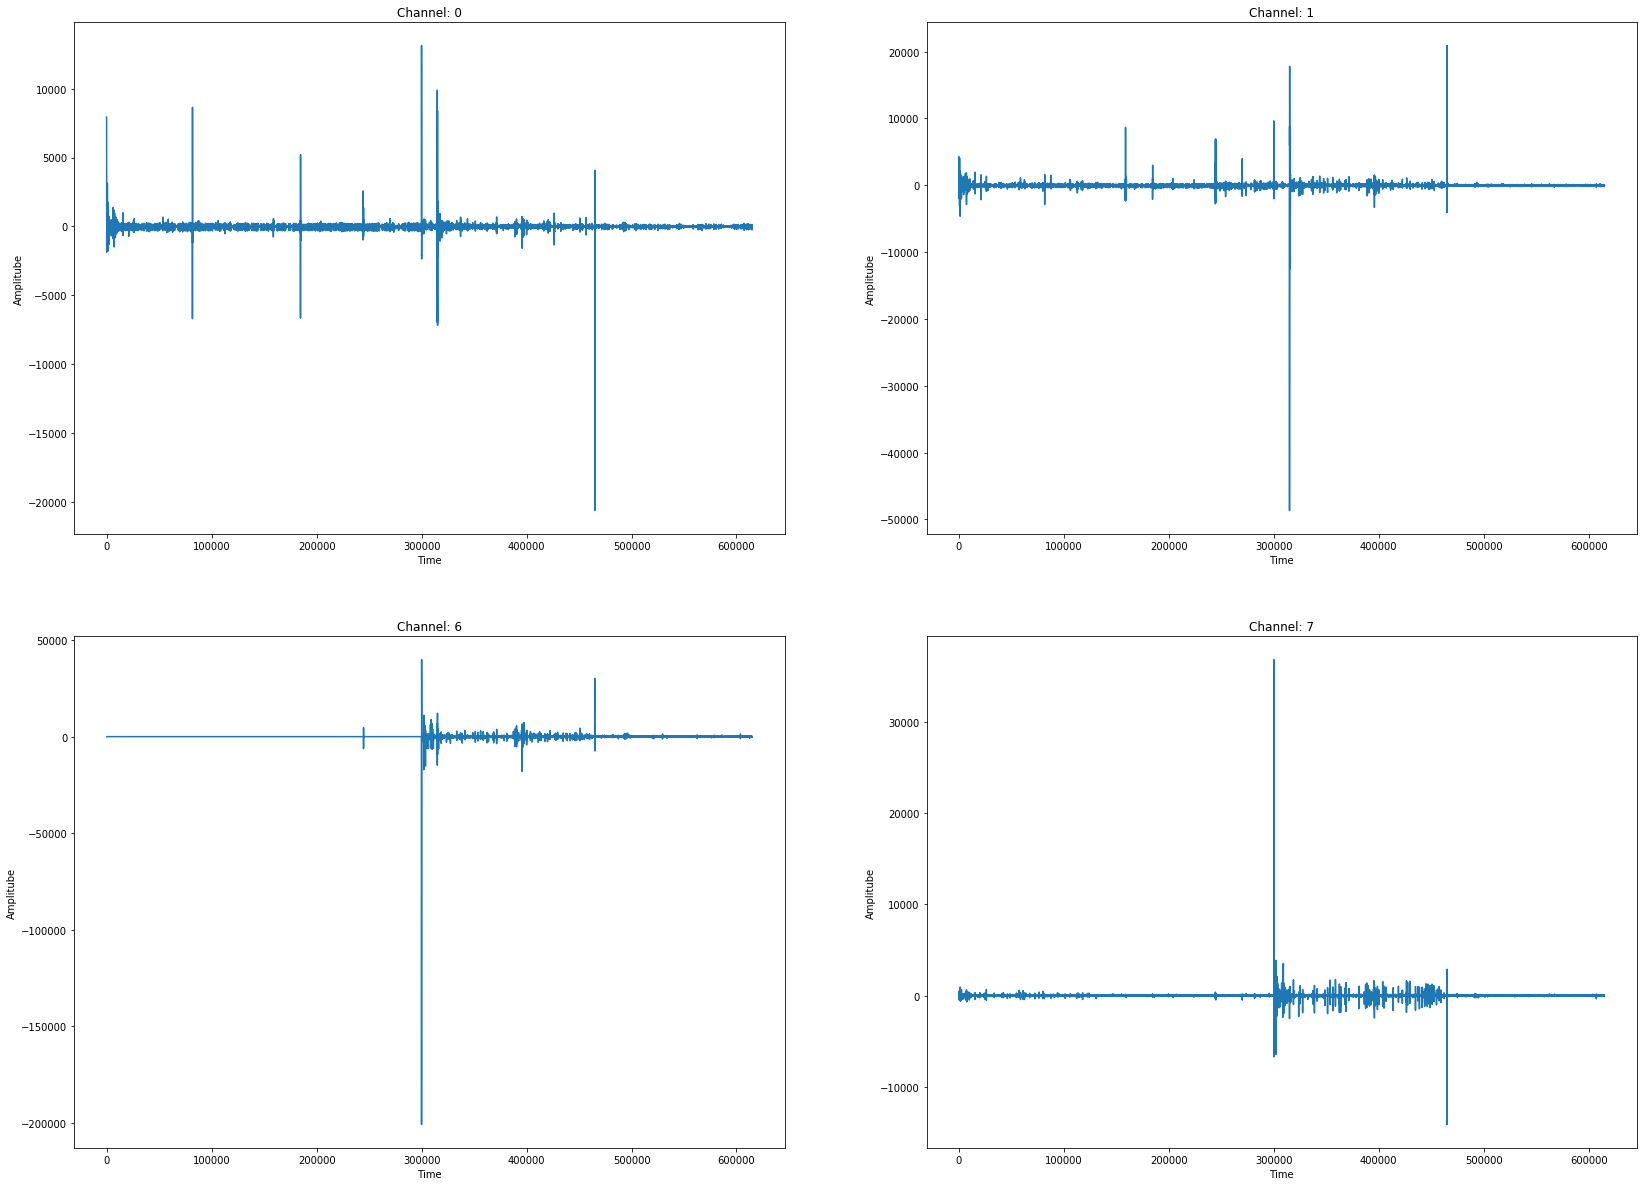

In [5]:
plot_signal(w_data,channels=[0,1,6,7])

# Remove bad epochs

In [6]:
from features import clean_data

ec_clean_data, w_clean_data = clean_data(ec_data,w_data,channels=[0,1,6,7])

Processing file:1
Processing file:2


In [7]:
print(ec_clean_data.shape)
print(w_clean_data.shape)

(1693, 4, 250)
(2249, 4, 250)


# Plot clean data

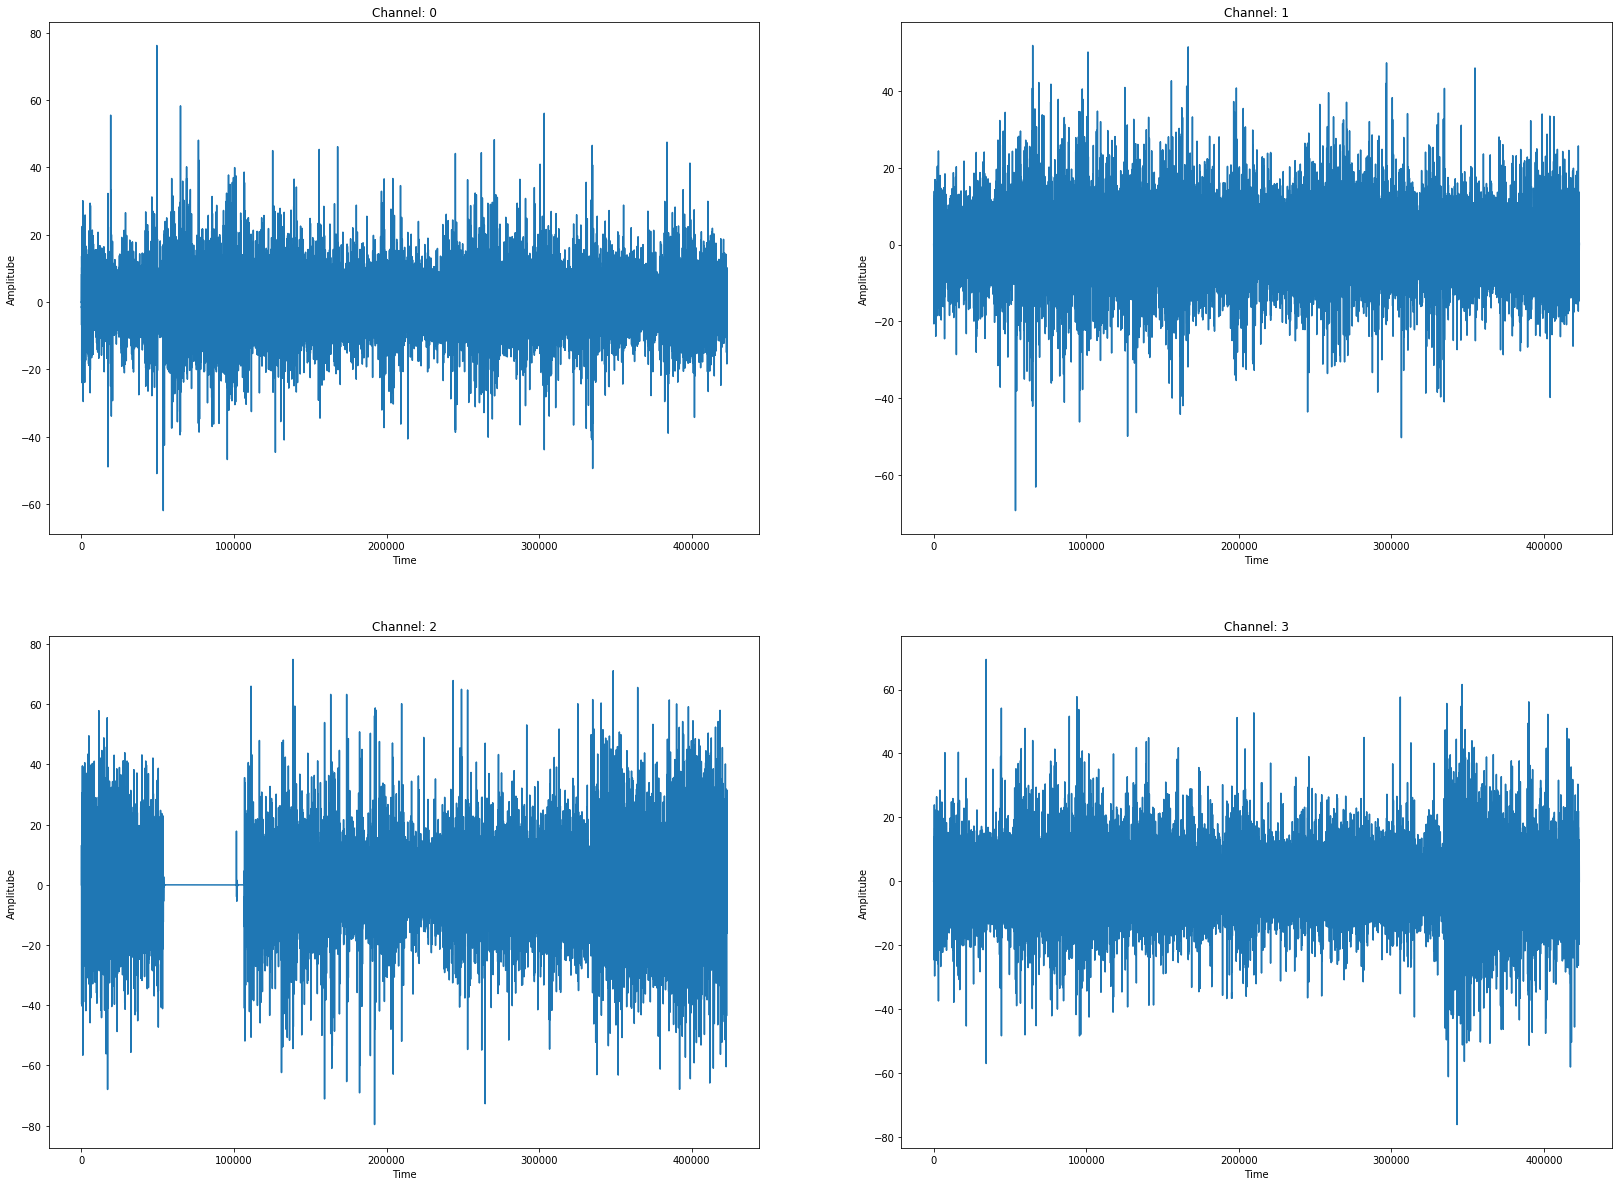

In [8]:
plot_signal(ec_clean_data,channels=[0,1,2,3])

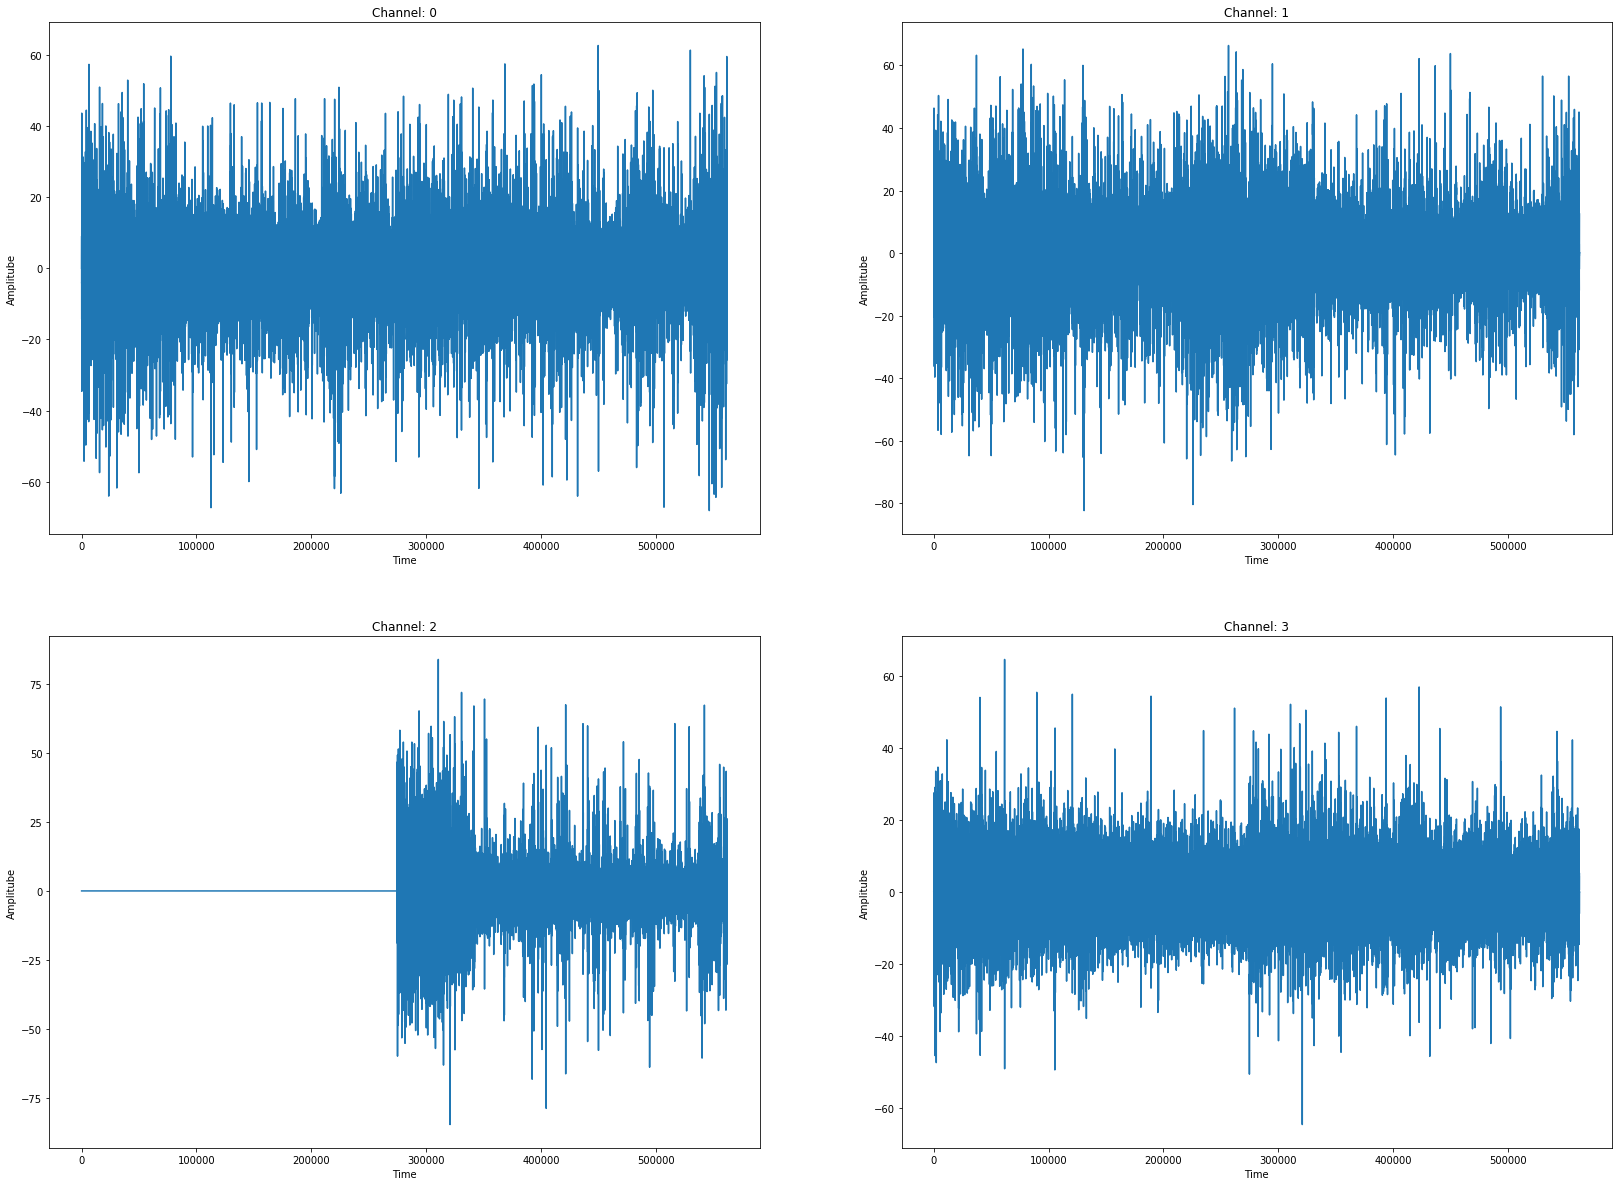

In [9]:
plot_signal(w_clean_data,channels=[0,1,2,3])

# get bandpower

In [10]:
from features import epoch_bandpower
ec_band, w_band = epoch_bandpower(ec_clean_data,w_clean_data,per_epoch=5,channels=[0,1,2,3])

Processing file:1
Processing file:2


In [11]:
print(ec_band.shape)
print(w_band.shape)

(339, 4, 5)
(450, 4, 5)


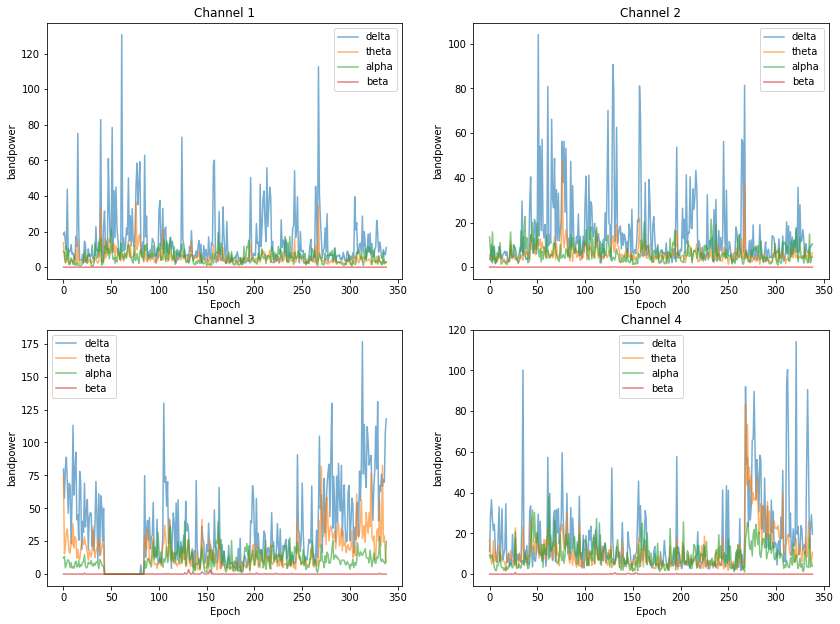

In [12]:
from features import plot_bandpower
plot_bandpower(ec_band)

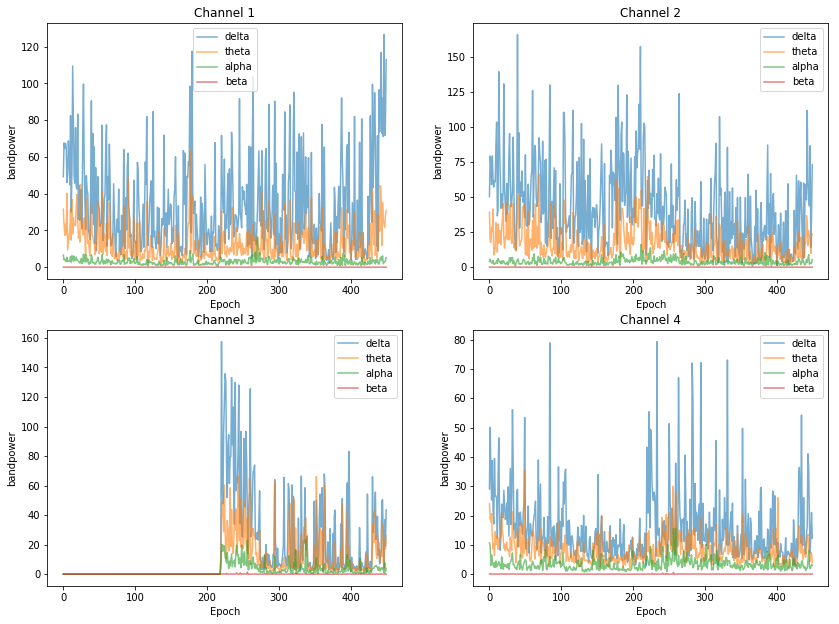

In [13]:
plot_bandpower(w_band)

# Calculte beta/(alpha+theta)

In [15]:
def calculate_metric_1(data):
    ''' Calculate the metric beta/(alpha+theta)'''
    pass

In [35]:
ec_metric = ec_band[...,4]/(ec_band[...,1]+ec_band[...,2])
w_metric = w_band[...,4]/(w_band[...,1]+w_band[...,2])

In [33]:
ec_metric = ec_band[...,1]/ec_band[...,4]
w_metric = w_band[...,1]/w_band[...,4]


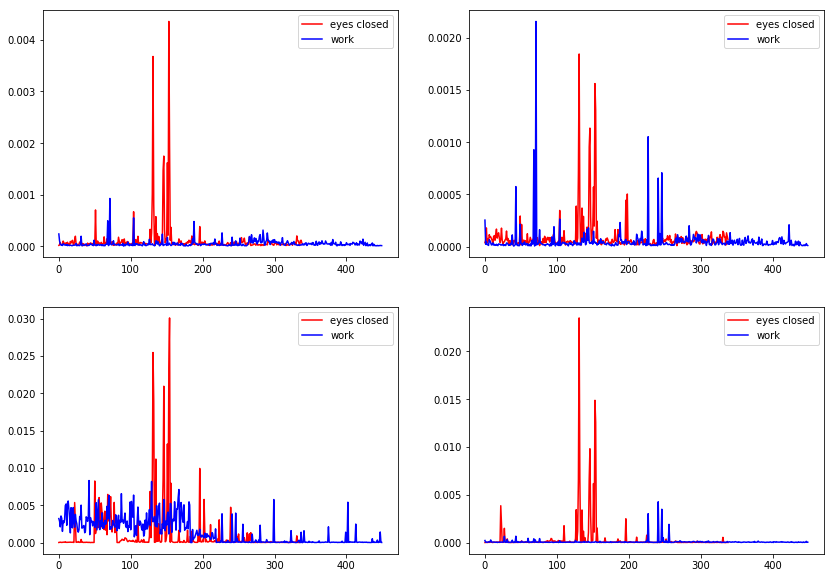

In [38]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2,figsize=(14,10))
ax = ax.reshape(-1)
for i in range(4):
    ax[i].plot(ec_metric[...,i],c='r',label="eyes closed")
    ax[i].plot(w_metric[...,i],c='b',label="work")
    ax[i].legend()